# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns

X = pd.DataFrame(boston, columns = columns[:-1])
y = pd.DataFrame(boston, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
1,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
2,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
4,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [3]:
y.head()

,MEDV
0,18.9
1,21.7
2,20.4
3,18.2
4,19.9


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Verificando estrutura da base de dados
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     495 non-null    float64
 1   ZN       495 non-null    float64
 2   INDUS    495 non-null    float64
 3   CHAS     495 non-null    float64
 4   NOX      495 non-null    float64
 5   RM       495 non-null    float64
 6   AGE      495 non-null    float64
 7   DIS      495 non-null    float64
 8   RAD      495 non-null    float64
 9   TAX      495 non-null    float64
 10  PTRATIO  495 non-null    float64
 11  B        495 non-null    float64
 12  LSTAT    495 non-null    float64
 13  MEDV     495 non-null    float64
dtypes: float64(14)
memory usage: 54.3 KB


**Observação:** não há variáveis string e nem valores 'missing' na base de dados

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [5]:
# Verificando a matriz de correlações
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.202716,0.403533,-0.058530,0.418705,-0.218650,0.356498,-0.376072,0.623850,0.581035,0.286865,-0.382786,0.462245,-0.388969
ZN,-0.202716,1.000000,-0.543283,-0.043841,-0.522817,0.317924,-0.574715,0.675971,-0.317231,-0.322007,-0.396422,0.177705,-0.424764,0.368070
INDUS,0.403533,-0.543283,1.000000,0.058663,0.762995,-0.389681,0.652380,-0.705938,0.590454,0.716956,0.380806,-0.353360,0.609301,-0.482093
CHAS,-0.058530,-0.043841,0.058663,1.000000,0.088588,0.093281,0.088027,-0.094745,-0.011624,-0.040812,-0.128486,0.051385,-0.055466,0.178581
NOX,0.418705,-0.522817,0.762995,0.088588,1.000000,-0.299473,0.736784,-0.769889,0.608941,0.665335,0.187288,-0.377554,0.596112,-0.425223
RM,-0.218650,0.317924,-0.389681,0.093281,-0.299473,1.000000,-0.236503,0.205166,-0.206906,-0.289039,-0.366154,0.126587,-0.611686,0.693443
AGE,0.356498,-0.574715,0.652380,0.088027,0.736784,-0.236503,1.000000,-0.764037,0.461934,0.513352,0.277348,-0.276604,0.599813,-0.374322
DIS,-0.376072,0.675971,-0.705938,-0.094745,-0.769889,0.205166,-0.764037,1.000000,-0.489433,-0.527979,-0.220723,0.286994,-0.511692,0.249030
RAD,0.623850,-0.317231,0.590454,-0.011624,0.608941,-0.206906,0.461934,-0.489433,1.000000,0.909534,0.462239,-0.441401,0.493884,-0.380426
TAX,0.581035,-0.322007,0.716956,-0.040812,0.665335,-0.289039,0.513352,-0.527979,0.909534,1.000000,0.459452,-0.438713,0.549970,-0.467088


#### Variável com potencial preditiva:
* A variável **'LSTAT'** apresenta a maior correlação absoluta com a variável resposta **'MEDV'**.

### 3. Separe os dados em validação e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))
r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"
template1 = "O R2 da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))
print(template.format(regr_1.get_depth(),r2_1).replace(".",","))
print(template.format(regr_2.get_depth(),r2_2).replace(".",","))

O MSE da árvore com profundidade=8 é: 1,85
O MSE da árvore com profundidade=2 é: 26,97
O MSE da árvore com profundidade=8 é: 0,98
O MSE da árvore com profundidade=2 é: 0,67


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

**Resposta:** a árvore com profundiade igual a 8 pois apresentou o menor **erro quadrático médio - MSE** e o maior **coeficiente de determinação - R²**

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

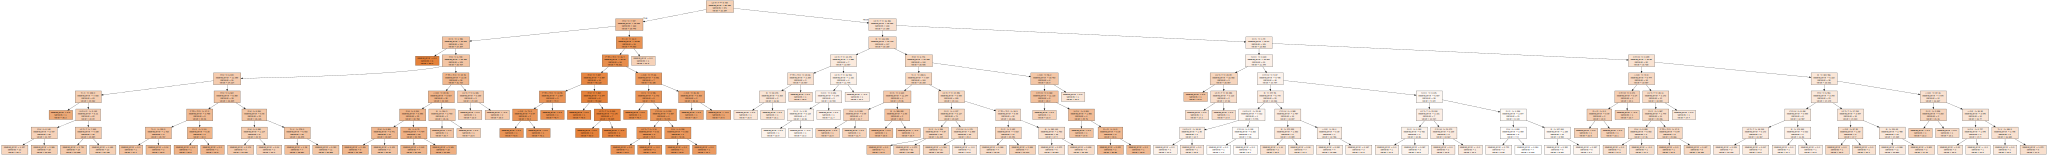

In [9]:
# DOT data
dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#### Variável "mais importante":
* Na minha opinião, a variável **"mais importante"** é a **'LSTAT'** que além de apresentar a maior correlação absoluta com a variável resposta **'MEDV'**, é aquela que dar **início** a árvore de regressão.